May 9: Looking at the results of GYRE, the NEMO configuration test run.

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
#%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
testT = nc.Dataset('/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/GYRE_Test/EXP00/GYRE_5d_00010101_00011230_grid_T.nc')
testU = nc.Dataset('/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/GYRE_Test/EXP00/GYRE_5d_00010101_00011230_grid_U.nc')
testV = nc.Dataset('/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/GYRE_Test/EXP00/GYRE_5d_00010101_00011230_grid_V.nc')
testW = nc.Dataset('/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/GYRE_Test/EXP00/GYRE_5d_00010101_00011230_grid_W.nc')
mmask = nc.Dataset('/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/GYRE_Test/EXP00/mesh_mask.nc')

GYRE structure (t, z, y, x) = (72, 31, 22, 32)

In [3]:
tem = testT.variables['votemper']
sal = testT.variables['vosaline']
ssh = testT.variables['sossheig']
U = testU.variables['vozocrtx']
V = testV.variables['vomecrty']
W = testW.variables['vovecrtz']
lon = testT.variables['nav_lon']
lat = testT.variables['nav_lat']

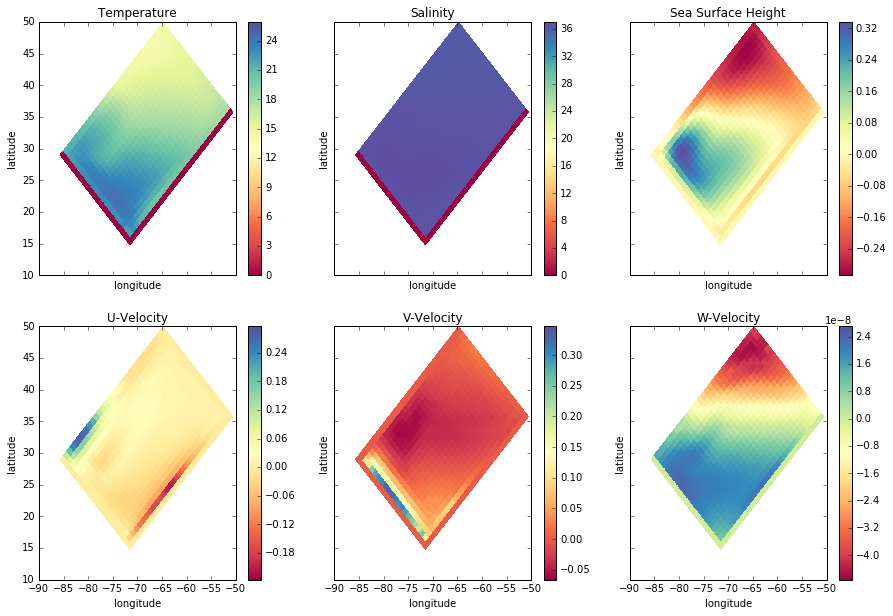

In [8]:
fig, [(ax1,ax2,ax3),(ax4,ax5,ax6)] = plt.subplots(2,3,figsize=(15,10),sharex=True, sharey=True)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
varb = [tem, sal, ssh, U, V, W]
ttls = ['Temperature', 'Salinity', 'Sea Surface Height', 'U-Velocity', 'V-Velocity', 'W-Velocity']
dep =0
def draw(t, axes, varb, ttls):
    for ax, var, ttl in zip(axes, varb, ttls):
        if var == ssh:
            cmax = var[15:,:,:].max()
            cmin = var[15:,:,:].min()
            c = ax.pcolor(lon, lat, var[t,:,:], cmap=cm.Spectral, vmin=cmin, vmax=cmax)
            if t == 0:
                cbar = fig.colorbar(c, ax=ax)
                cbar.set_clim(cmin,cmax)
            else:
                pass
        else:
            cmax = var[15:,0,:,:].max()
            cmin = var[15:,0,:,:].min()
            c = ax.pcolor(lon, lat, var[t,dep,:,:], cmap=cm.Spectral, vmin=cmin, vmax=cmax)
            if t == 0:
                cbar = fig.colorbar(c, ax=ax)
                cbar.set_clim(cmin,cmax)
            else:
                pass
        ax.set_title(ttl)
        ax.set_ylabel('latitude')
        ax.set_xlabel('longitude')
    return ax

def init():
    pass
    
def animate(t):
    draw(t, axes, varb, ttls)
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=71, interval=20, blit=False, repeat=False)
mywriter = animation.FFMpegWriter()
anim.save('gyre_test0.mp4',writer=mywriter,fps=1)